In [1]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import circlify
#% matplotlib inline
from datetime import datetime

import plotly
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')

import string
import gensim
import collections
from gensim.corpora import Dictionary

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

from sklearn.feature_extraction.text import CountVectorizer
from bertopic.backend import WordDocEmbedder
import gensim.downloader as api
from bertopic import BERTopic

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sentence_transformers import SentenceTransformer
import hdbscan
import matplotlib.pyplot as plt

import umap

from autocorrect import Speller

from bs4 import BeautifulSoup
import requests
import csv
import time

import jellyfish

import re
import string
import gc
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# gathering up all the data from the files received in via Google Scholar search 

df1 = pd.read_csv('data/2012.csv')
df2 = pd.read_csv('data/2013.csv')
df3 = pd.read_csv('data/2014.csv')
df4 = pd.read_csv('data/2015.csv')
df5 = pd.read_csv('data/2016.csv')
df6 = pd.read_csv('data/2017.csv')
df7 = pd.read_csv('data/2018.csv')
df8 = pd.read_csv('data/2019.csv')
df9 = pd.read_csv('data/2020.csv')
df10 = pd.read_csv('data/2021.csv')
df11 = pd.read_csv('data/2022.csv')


df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)
df.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,1,M Turno,'Dai che mi vesto da puttana!': Cultural Repre...,2012.0,NaN,Citeseer,https://citeseerx.ist.psu.edu/viewdoc/download...,https://scholar.google.com/scholar?cites=68233...,93,2022-07-17 10:02:25,...,NaN,NaN,1,0.1,1,1,10.0,"Nadia frantically tries to escape, chased by a...",https://citeseerx.ist.psu.edu/viewdoc/download...,https://scholar.google.com/scholar?q=related:x...
1,1,Z Vaisman,A Cognitive-Behavioral Therapy Model for the T...,2012.0,NaN,search.proquest.com,https://search.proquest.com/openview/e9d6eb306...,https://scholar.google.com/scholar?cites=14365...,27,2022-07-17 10:02:25,...,NaN,NaN,1,0.1,1,1,10.0,… to impose such a classification in our next ...,NaN,https://scholar.google.com/scholar?q=related:P...
2,0,J Lammi,A genre analysis of Iain M. Banks' The Player ...,2012.0,NaN,erepo.uef.fi,https://erepo.uef.fi/bitstream/handle/12345678...,NaN,82,2022-07-17 10:02:25,...,NaN,NaN,0,0.0,0,1,10.0,… Sentient artificial intelligence has also be...,https://erepo.uef.fi/bitstream/handle/12345678...,https://scholar.google.com/scholar?q=related:n...
3,31,MR Davidson,A nurse's guide to women's mental health,2012.0,NaN,books.google.com,https://books.google.com/books?hl=en&lr=&id=I3...,https://scholar.google.com/scholar?cites=15456...,37,2022-07-17 10:02:25,...,NaN,NaN,31,3.1,31,1,10.0,Named a 2013 Doody's Core Title! 2012 Third Pl...,NaN,https://scholar.google.com/scholar?q=related:8...
4,3,A Wright,A review of best practices in child welfare,2012.0,NaN,books.google.com,https://books.google.com/books?hl=en&lr=&id=hg...,https://scholar.google.com/scholar?cites=13797...,48,2022-07-17 10:02:25,...,NaN,NaN,3,0.3,3,1,10.0,"… the child welfare field, as BP provide the i...",http://phoenixsinclairinquiry.ca/exhibits/exhi...,https://scholar.google.com/scholar?q=related:h...


In [3]:
# View the columns
df.columns

Index(['Cites', 'Authors', 'Title', 'Year', 'Source', 'Publisher',
       'ArticleURL', 'CitesURL', 'GSRank', 'QueryDate', 'Type', 'DOI', 'ISSN',
       'CitationURL', 'Volume', 'Issue', 'StartPage', 'EndPage', 'ECC',
       'CitesPerYear', 'CitesPerAuthor', 'AuthorCount', 'Age', 'Abstract',
       'FullTextURL', 'RelatedURL'],
      dtype='object')

In [4]:
df[['ArticleURL']].iloc[10]  #not in full-text #difficult to scrape web data

ArticleURL    https://link.springer.com/article/10.1007/s105...
Name: 10, dtype: object

In [5]:
df['Source'].value_counts()

# shows a lot of preprints, and it occupies the largest share of the lot

arXiv preprint arXiv …                                   85
api.taylorfrancis.com                                    34
researchgate.net                                         27
Journal of …                                             26
Proceedings of the …                                     24
                                                         ..
CENTRAL EUROPEAN POLITICAL SCIENCE                        1
The Kaleidoscope of Gender: Prisms, Patterns, and …       1
Busted! The Truth about the 50 Most Common Internet …     1
Psychology, Crime & Law                                   1
CHI Conference on Human Factors in …                      1
Name: Source, Length: 1581, dtype: int64

In [6]:
df['Source'].isna().count() 
# The high number of NA could be because of a large number of preprints

3892

### Years

In [7]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.strftime('%Y')
df = df[~(df['Year'] < '2012')] # Seems like there were a few examples which dated before 2012

In [8]:
n_years = df['Year'].value_counts().reset_index(name='total')
n_years = n_years.sort_values(by="index", ascending=False)[["index", "total"]]
n_years

,index,total
2,2022,528
0,2021,883
1,2020,553
3,2019,462
4,2018,334
5,2017,237
6,2016,175
8,2015,108
7,2014,124
9,2013,107


In [9]:
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "bar"}]])

fig.add_trace(go.Bar(
     x=n_years['index'], y=n_years['total'], showlegend=False,
    text =n_years['total'], 
     name="Years"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_line_color='rgb(8,48,107)',  marker_line_width=1.5)
fig.update_yaxes(range=[0,1000])
fig.show()

### Publishers

In [10]:
df['Publisher'].unique()

array(['Citeseer', 'search.proquest.com', 'erepo.uef.fi',
       'books.google.com', 'liebertpub.com', 'api.taylorfrancis.com',
       'Taylor & Francis', 'Springer', 'scipedia.com',
       'taylorfrancis.com', 'thescholarship.ecu.edu', 'theses.fr', nan,
       'blancharder.wordpress.com', 'dc.etsu.edu', 'journals.sagepub.com',
       'academiccommons.columbia.edu', 'lurepository.lakeheadu.ca',
       'psycnet.apa.org', 'core.ac.uk', 'researchgate.net',
       'jbe-platform.com', 'd.lib.msu.edu', 'summit.sfu.ca',
       'scholarworks.boisestate.edu', 'kisseng.kstudy.com',
       'studenttheses.uu.nl', 'stars.library.ucf.edu',
       'dr.library.brocku.ca', 'utpjournals.press',
       'digital.lib.washington.edu', 'deepblue.lib.umich.edu',
       'academia.edu', 'existenz.us', 'openaccess.wgtn.ac.nz',
       'tel.archives-ouvertes.fr', 'torrossa.com', 'Google Patents',
       'dashboard.commons.pacificu.edu',
       'research-repository.griffith.edu.au', 'etd.ceu.edu', 'tdx.cat',
      

In [11]:
df['Publisher'] = df['Publisher'].replace(['taylorfrancis.com', 'api.taylorfrancis.com'],'Taylor & Francis')
df['Publisher'] = df['Publisher'].replace(['search.proquest.com'],'ProQuest')
df['Publisher'] = df['Publisher'].replace(['taylorfrancis.com', 'api.taylorfrancis.com'],'Taylor & Francis')
df['Publisher'] = df['Publisher'].replace(['books.google.com'],'Google Books')
df['Publisher'] = df['Publisher'].replace(['erepo.uef.fi'],'UEF eRepo')
df['Publisher'] = df['Publisher'].replace(['arxiv.org'],'arXiv')
df['Publisher'] = df['Publisher'].replace(['journals.sagepub.com'],'SAGE Publications')
df['Publisher'] = df['Publisher'].replace(['dl.acm.org'],'ACM Digital Library')
df['Publisher'] = df['Publisher'].replace(['aclanthology.org'],'ACL Anthology')
df['Publisher'] = df['Publisher'].replace(['ieeexplore.ieee.org'],'IEEE Xplore')
df['Publisher'] = df['Publisher'].replace(['papers.ssrn.com'],'SSRN eLibrary')
df['Publisher'] = df['Publisher'].replace(['mdpi.com'],'MDPI')
df['Publisher'] = df['Publisher'].replace(['researchgate.net'],'ResearchGate')
df['Publisher'] = df['Publisher'].replace(['psycnet.apa.org'],'APA Psycnet')
df['Publisher'] = df['Publisher'].replace(['library.oapen.org'],'OAPEN')
df['Publisher'] = df['Publisher'].replace(['ceur-ws.org'],'CEUR Workshop')
df['Publisher'] = df['Publisher'].replace(['academia.edu'],'Academia.edu')
df['Publisher'] = df['Publisher'].replace(['emerald.com'],'Emerald Publishing')
df['Publisher'] = df['Publisher'].replace(['academic.oup.com'],'Oxford Academic')


In [12]:
# Viewing only top 20 publishers to check their count
n_publishers = df['Publisher'].value_counts().reset_index(name='total')[:20]
n_publishers = n_publishers.sort_values(by="total", ascending=False)[["index", "total"]]
n_publishers

,index,total
0,Taylor & Francis,706
1,Google Books,483
2,ProQuest,387
3,Springer,220
4,arXiv,148
5,SAGE Publications,66
6,ACM Digital Library,62
7,Elsevier,53
8,ACL Anthology,51
9,IEEE Xplore,51


In [13]:
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "bar"}]])

fig.add_trace(go.Bar(
     x=n_publishers['index'], y=n_publishers['total'], showlegend=False,
    text =n_publishers['total'],
     name="Top 20 Publishers"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_line_color='rgb(8,48,107)',  marker_line_width=1)
fig.update_yaxes(range=[0,800])
fig

In [14]:
# Viewing the top 10 publishers vs the others

colors = ['#1F77B4', '#FF7F0E', '#2CA02C', 'rgb(255, 255, 51)', 'rgb(127, 60, 141)', '#8C564B', '#BCBD22', '#17BECE', '#7F7F7F', '#222A2A', 'rgb(228, 26, 28)']

top10pubs = df['Publisher'].value_counts()[:10].reset_index(name='total')

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=top10pubs['index'], y=top10pubs['total'], showlegend=False,
    text =top10pubs['total'],
     name="Top 10 publications"), 
     row=1, col=1)
fig.update_yaxes(range=[0,750])
fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5)

list_top10pubs = list(df['Publisher'].value_counts()[:10].keys())

others_count = len(df.loc[~df['Publisher'].isin(list_top10pubs)].dropna(subset=['Publisher']))
new_row = {'index': 'Others', 'total':others_count}
top10pubs = top10pubs.append(new_row, ignore_index=True)

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=top10pubs['total'],
     labels=top10pubs['index'].values, pull=[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025], hole=.3, 
    marker_colors=colors,
     name="Publication groups"),
    row=1, col=2)
fig.update_layout(title_text='Top 10 publications with most works on misogyny', title_x=0.5, title_y=0.985,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))

fig.show()



In [15]:
df['Source'].unique()

array([nan, "Journal of Women's Health", 'Journal of Sexual Aggression',
       ..., 'LGBTQ+ Family: An Interdisciplinary Journal',
       'Journal of Library …', 'CHI Conference on Human Factors in …'],
      dtype=object)

In [16]:
df['Type'].unique() #not useful AT ALL

array(['PDF', 'BOOK', nan, 'HTML', 'CITATION', 'TXT'], dtype=object)

In [17]:
# Grouping the manuscript types together

L = ['conference', 'journal', 'article', 'thesis', 'dissertation', 
     'handbook', 'report', 'book', 'encyclopedia', 'research']
# article can be termed similar to journals, since usually they come together


pat = '|'.join(r"\b{}\b".format(x) for x in L)

df['Type of Source'] = df['Source'].str.findall(pat, flags=re.I).str.join(', ')

df['Type of Source'].value_counts() # shows using 'research' as a keyword is redundant, and usually the other keyword is the important one
# Also hence use extract instead of findall, and arrange the order of the keywords according to preference

                          1599
Journal                    366
Conference                  59
Handbook                    33
Encyclopedia                27
Research                    18
Journal, Research           16
journal                     13
handbook                     8
research                     7
Research, Encyclopedia       3
Dissertation                 2
Thesis                       2
journal, research            2
Journal, research            2
Handbook, Research           2
JOURNAL                      1
Journal, Conference          1
Book                         1
conference                   1
Conference, Research         1
Name: Type of Source, dtype: int64

In [18]:
df['Type of Source'] = df['Source'].str.extract('('+ pat + ')', expand=False, flags=re.I)
df['Type of Source'] = df['Type of Source'].replace(['journal', 'JOURNAL'],'Journal')
df['Type of Source'] = df['Type of Source'].replace(['conference'],'Conference')
df['Type of Source'] = df['Type of Source'].replace(['handbook', 'Handbook', 'Encyclopedia'],'Book') # Can encyclopedia be clubbed as well?
# and should I keep 'book' instead of handbook
df['Type of Source'] = df['Type of Source'].replace(['Dissertation', 'Research', 'research'],'Thesis') # can research also be clubbed with this?

df['Type of Source'].value_counts()

Journal       401
Book           71
Conference     61
Thesis         32
Name: Type of Source, dtype: int64

In [19]:
df_sources = pd.DataFrame({
    'sources': df['Type of Source'].dropna().unique(),
    'count': df['Type of Source'].value_counts().tolist()
})


color_discrete_map = {df_sources['sources'][0]: '#FC6955', 
                      df_sources['sources'][1]: 'rgb(255, 255, 51)', 
                      df_sources['sources'][2]: 'black',
                      df_sources['sources'][3]: 'rgb(47, 138, 196)'}
fig = px.bar(df_sources, x="sources", y="count", color= "sources", color_discrete_map=color_discrete_map,
            hover_data=['sources'], text ='count')
fig.update_layout(title_text='Sources of manuscripts', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

<AxesSubplot:xlabel='Publisher'>

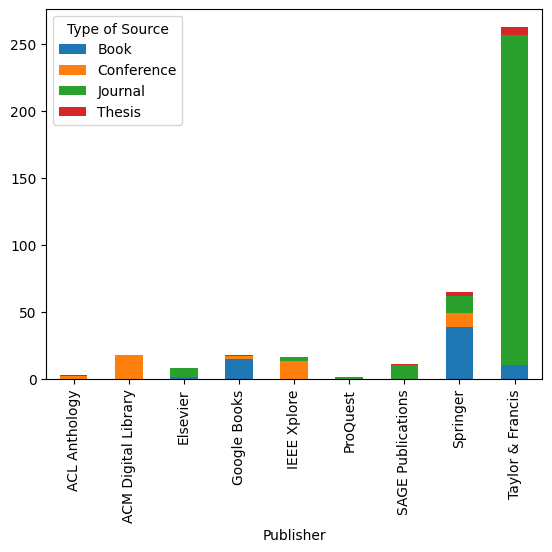

In [20]:
# Type of sources and publisher

list_top10pubs = list(df['Publisher'].value_counts()[:10].keys())
df_pub_source= df.loc[df['Publisher'].isin(list_top10pubs)]
df_pub_source = df_pub_source.groupby(['Type of Source','Publisher']).size().reset_index().rename(columns={0:'count'})
df_pub_source= df_pub_source.sort_values(['Publisher', 'count'],axis=0,ascending=False)
df_pub_source
# arXiv not there as all are preprints

df_pub_source.pivot(index=["Publisher"], columns='Type of Source', values='count').plot(kind='bar', stacked=True)


In [21]:
# Top 10 publishers with their count of manuscripts
fig = px.bar(df_pub_source, x="count", y="Publisher", color="Type of Source",
            hover_data=['Publisher'], barmode = 'stack',
            color_discrete_map={
                'Journal': '#FC6955',
                'Book': 'rgb(255, 255, 51)',
                'Thesis': 'black',
                'Conference': 'rgb(47, 138, 196)'
                     }, text ='count')
fig.update_layout(title_text='Top 10 publications by their sources', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

### Type of sources and conferences

In [22]:
# However including the exclusion criteria, we only take the ones which are 
# 1. published through conferences/journals
# 2. the preprints

df_conf_jour = df[(df["Type of Source"].isin(['Conference', 'Journal'])) | (df["Publisher"] == 'arXiv')]
df_conf_jour['Type of Source'] = df_conf_jour['Type of Source'].fillna('Preprints') # replacing nans with preprints
df_conf_jour

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL,Type of Source
5,0,"JD Nagel, J Rudick",Abstracts from the NIH Office of Research on W...,2012,Journal of Women's Health,liebertpub.com,https://www.liebertpub.com/doi/full/10.1089/jw...,NaN,21,2022-07-17 10:02:25,...,NaN,0,0.0,0,2,10.0,"… following activation by calcium, 5 pM tissue...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,Journal
9,129,"A Pina, TA Gannon","An overview of the literature on antecedents, ...",2012,Journal of Sexual Aggression,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/13...,https://scholar.google.com/scholar?cites=10841...,19,2022-07-17 10:02:25,...,NaN,129,12.9,65,2,10.0,The detrimental effects of sexual harassment h...,https://kar.kent.ac.uk/25836/2/Pina%20%26%20Ga...,https://scholar.google.com/scholar?q=related:c...,Journal
12,23,MG Durham,"Blood, lust and love: Interrogating gender vio...",2012,Journal of Children and Media,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/17...,https://scholar.google.com/scholar?cites=90340...,33,2022-07-17 10:02:25,...,NaN,23,2.3,23,1,10.0,"… point of view, thus strengthening the reader...",https://www.tandfonline.com/doi/pdf/10.1080/17...,https://scholar.google.com/scholar?q=related:u...,Journal
25,9,M O'Connell,"Don't act, don't tell: Discrimination based on...",2012,Journal of Gay & Lesbian Mental Health,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/19...,https://scholar.google.com/scholar?cites=18134...,24,2022-07-17 10:02:25,...,NaN,9,0.9,9,1,10.0,"… , bullying, suicides, and hate crimes agains...",NaN,https://scholar.google.com/scholar?q=related:H...,Journal
27,25,EC Bishop,Examining the raunch culture thesis through yo...,2012,Journal of Youth Studies,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/13...,https://scholar.google.com/scholar?cites=90923...,35,2022-07-17 10:02:25,...,NaN,25,2.5,25,1,10.0,… Pornography was conceptualised as the epitom...,http://ecite.utas.edu.au/78545/3/78545%20-%20E...,https://scholar.google.com/scholar?q=related:g...,Journal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,0,"J Lloyd, V Bradbury",Zero tolerance to sexual harm in schools–from ...,2022,Journal of Sexual Aggression,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/13...,NaN,444,2022-07-17 13:58:58,...,NaN,0,0.0,0,2,1.0,… they do not recognise harmful sexual inciden...,https://www.tandfonline.com/doi/pdf/10.1080/13...,https://scholar.google.com/scholar?q=related:J...,Journal
3880,0,E Castro,“How every Black man should be”: Historical na...,2022,The Journal of Social Studies Research,Elsevier,https://www.sciencedirect.com/science/article/...,NaN,403,2022-07-17 13:58:58,...,NaN,0,0.0,0,1,1.0,This case study is a sociocultural analysis of...,NaN,https://scholar.google.com/scholar?q=related:N...,Journal
3881,0,C Horton,“I Was Losing That Sense of Her Being Happy”—T...,2022,LGBTQ+ Family: An Interdisciplinary Journal,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/27...,NaN,493,2022-07-17 13:58:58,...,NaN,0,0.0,0,1,1.0,"… So as a concept I absolutely hate it, and wo...",https://www.tandfonline.com/doi/pdf/10.1080/27...,https://scholar.google.com/scholar?q=related:V...,Journal
3887,1,"A Glusker, C Emmelhainz, N Estrada…",“Viewed as Equals”: The Impacts of Library Org...,2022,Journal of Library …,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/01...,https://scholar.google.com/scholar?cites=70832...,438,2022-07-17 13:58:58,...,NaN,1,1.0,0,4,1.0,… Staff who reported low morale were often in ...,https://www.tandfonline.com/doi/pdf/10.1080/01...,https://scholar.google.com/scholar?q=related:I...,Journal


In [23]:
df_conf_jour_yr = df_conf_jour.groupby(['Year', 'Type of Source']).size().reset_index().rename(columns={0:'Count'})
df_conf_jour_yr= df_conf_jour_yr.sort_values(['Year'],axis=0,ascending=False)


fig = px.bar(df_conf_jour_yr, y="Count", x="Year", color="Type of Source",
            hover_data=['Year'], barmode = 'stack',
            color_discrete_map={
                'Journal': '#FC6955',
                'Preprints': 'rgb(255, 255, 51)',
                'Conference': 'rgb(47, 138, 196)'
                     }, text ='Count')
fig.update_layout(title_text='Sources by the years', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()


### Sources and their subjects

In [24]:
df['Source'].value_counts()

arXiv preprint arXiv …                                   85
api.taylorfrancis.com                                    34
researchgate.net                                         27
Journal of …                                             26
Proceedings of the …                                     24
                                                         ..
CENTRAL EUROPEAN POLITICAL SCIENCE                        1
The Kaleidoscope of Gender: Prisms, Patterns, and …       1
Busted! The Truth about the 50 Most Common Internet …     1
Psychology, Crime & Law                                   1
CHI Conference on Human Factors in …                      1
Name: Source, Length: 1580, dtype: int64

In [25]:
df_sou_sub = df[['Source', 'Type of Source']]
df_sou_sub = df_sou_sub.loc[~df_sou_sub['Type of Source'].isna()] # Removing the nan values
df_sou_sub = df_sou_sub.loc[~(df_sou_sub['Type of Source'] == 'Thesis')] # Removing the thesis type

df_sou_sub = pd.DataFrame({
    'Source': df_sou_sub['Source'].tolist()
    #'Source': df_sou_sub['Source'].unique().tolist(),
    #'counts': df_sou_sub['Source'].value_counts()
}).reset_index(drop=True)

df_sou_sub


,Source
0,Journal of Women's Health
1,Journal of Sexual Aggression
2,Handbook of Psychology and Sexual Orientation
3,Journal of Children and Media
4,Journal of Gay & Lesbian Mental Health
...,...
528,Journal of Sexual Aggression
529,The Journal of Social Studies Research
530,LGBTQ+ Family: An Interdisciplinary Journal
531,Journal of Library …


In [26]:
# Clean the source of any domains = ['com', 'net', 'co']

df_sou_sub["Source"] = df_sou_sub["Source"].str.strip('.net')
df_sou_sub["Source"] = df_sou_sub["Source"].str.strip('.com')
df_sou_sub["Source"] = df_sou_sub["Source"].str.strip('.co')

df_sou_sub["Source"] = df_sou_sub["Source"].replace('-', ' ', regex=True)


df_sou_sub["Source"] = df_sou_sub["Source"].str.lower()


In [27]:
# Check occurrences for journals
df_sou_sub["Source"].str.contains('Journal').sum(), df_sou_sub["Source"].str.contains('journal').sum(), df_sou_sub["Source"].str.contains('JOURNAL').sum()

(0, 401, 0)

In [28]:
# See how those words are

# 'journal'
contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('journal')]

# Similarly for 'JOURNAL'
# contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('JOURNAL')]

contain_values

,Source
0,journal of women's health
1,journal of sexual aggressi
3,journal of children and media
4,journal of gay & lesbian mental health
5,journal of youth studies
...,...
526,european journal of engineering educati
528,journal of sexual aggressi
529,the journal of social studies research
530,lgbtq+ family: an interdisciplinary journal


In [29]:
contain_values['Source'].loc[41]
# Has '...' after the journal, so cannot be extracted properly
# Many such examples are there

'journal of bisexuality'

In [30]:
# Check occurrences for conferences
df_sou_sub["Source"].str.contains('conference').sum(), df_sou_sub["Source"].str.contains('Conference').sum(), df_sou_sub["Source"].str.contains('Conferences').sum()

(60, 0, 0)

In [31]:
# 'conference'
contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('conference')]

# 'Conference'
# contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('Conference')]

# 'Conferences'
#contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('Conferences')] # string before

contain_values

,Source
6,international conference on social …
64,… international joint conference on artificial...
97,international conference on recent development...
128,alife 2018: the 2018 conference on artificial lif
145,australasian conference on data …
165,2019 ieee 21st conference on business …
169,6th italian conference on …
172,6th italian conference …
177,2019 ieee 21st conference on …
190,journal of physics: conference …


In [32]:
# 'Handbook'
# contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('Handbook')]
# observation: Some of the values need to be lowercased to match
# clean the values after this

# 'Book'
contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('Book')] # before

# 'book'
#contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('book')] # takes from handbook itself, so not considered

# Encyclopedia
#contain_values = df_sou_sub[df_sou_sub["Source"].str.contains('Encyclopedia')]
contain_values

,Source


In [33]:
def substring_extract(s, delim):
    str = ''
    for each in range(0, len(delim)):
        if s.endswith(delim[each]): 
            value = s.partition(delim[each])[0]
        else:
            value = s.partition(delim[each])[2]
        if jellyfish.jaro_distance(str, value) < 0.50:
            str += value
    return str

In [188]:
## These are the key words.  The pairs belong to separate lists--(journals, conferences) in 
## either order.  These lists tend to grow as more keywords are discovered.
journal_items = ['journal of', 'journal']
conference_items = ['conference on', 'conference']
book_items = [ 'handbook for', 'handbook of', 'handbook on', 'handbook', 'encyclopedia of', 'e-book']

In [189]:
# the apply(lambda) is slow but I don't mind it.
df_sou_sub['journals'] = df_sou_sub['Source'].apply(lambda x: substring_extract(x, journal_items))
df_sou_sub['conferences'] = df_sou_sub['Source'].apply(lambda x: substring_extract(x, conference_items)) 
df_sou_sub['books'] = df_sou_sub['Source'].apply(lambda x: substring_extract(x, book_items)) 

df_sou_sub

,Source,journals,conferences,books,subjects
0,journal of women's health,women's health,,,women's health
1,journal of sexual aggressi,sexual aggressi,,,sexual aggression
2,handbook of psychology and sexual orientati,,,psychology and sexual orientati,psychology and sexual orientation
3,journal of children and media,children and media,,,children and media
4,journal of gay & lesbian mental health,gay & lesbian mental health,,,gay and lesbian mental health
...,...,...,...,...,...
528,journal of sexual aggressi,sexual aggressi,,,sexual aggression
529,the journal of social studies research,social studies research,,,social studies
530,lgbtq+ family: an interdisciplinary journal,lgbtq+ family: an interdisciplinary,,,lgbtq+ family
531,journal of library …,library …,,,library …


##### Minor text cleaning

In [190]:
def minor_preprocess(text):
    spell = Speller(lang='en') #check spellings 
    text = spell(text) # does not seem to work well on this. Works better on individual sentences
    text = text.replace(r'&', 'and')
    text = text.replace(r':', '')
    text = text.replace(r'sexual aggressive', 'sexual aggression') # this was wrongly spelt
    text = text.replace(r'...', '') # replacing the null values with NA to remove them in a later stage
    text = text.replace(r'(', '')
    text = text.replace(r')', '') 

    '''
    Specifically for removing certain words from the texts to enrich them
    can consist of preprositions and other words
    '''
    stopwords = ['of', 'for', 'on', 'in', 'interdisciplinary', 'research', 'work', 'task', 'an', 'a']
    querywords = text.split()

    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    text = ' '.join(resultwords)

    return text 


df_sou_sub['journals'] = df_sou_sub['journals'].apply(minor_preprocess)
df_sou_sub['conferences'] = df_sou_sub['conferences'].apply(minor_preprocess)
df_sou_sub['books'] = df_sou_sub['books'].apply(minor_preprocess)

In [191]:
df_sou_sub

,Source,journals,conferences,books,subjects
0,journal of women's health,women's health,,,women's health
1,journal of sexual aggressi,sexual aggression,,,sexual aggression
2,handbook of psychology and sexual orientati,,,psychology and sexual orientation,psychology and sexual orientation
3,journal of children and media,children and media,,,children and media
4,journal of gay & lesbian mental health,gay and lesbian mental health,,,gay and lesbian mental health
...,...,...,...,...,...
528,journal of sexual aggressi,sexual aggression,,,sexual aggression
529,the journal of social studies research,social studies,,,social studies
530,lgbtq+ family: an interdisciplinary journal,lgbtq+ family,,,lgbtq+ family
531,journal of library …,library …,,,library …


In [192]:
df_sou_sub['subjects'] = df_sou_sub['journals'] + df_sou_sub['conferences'] + df_sou_sub['books']
#df_sou_sub['subjects'].isnull().unique() # no null values
df_sou_sub

,Source,journals,conferences,books,subjects
0,journal of women's health,women's health,,,women's health
1,journal of sexual aggressi,sexual aggression,,,sexual aggression
2,handbook of psychology and sexual orientati,,,psychology and sexual orientation,psychology and sexual orientation
3,journal of children and media,children and media,,,children and media
4,journal of gay & lesbian mental health,gay and lesbian mental health,,,gay and lesbian mental health
...,...,...,...,...,...
528,journal of sexual aggressi,sexual aggression,,,sexual aggression
529,the journal of social studies research,social studies,,,social studies
530,lgbtq+ family: an interdisciplinary journal,lgbtq+ family,,,lgbtq+ family
531,journal of library …,library …,,,library …


In [193]:
# Journals
df_journal = pd.DataFrame({
    'names': df_sou_sub['journals'].unique().tolist(),
    'journal_counts': df_sou_sub['journals'].value_counts()
}).reset_index(drop=True).drop([2], axis=0)

# Conferences
df_conference = pd.DataFrame({
    'names': df_sou_sub['conferences'].unique().tolist(),
    'conferences_counts': df_sou_sub['conferences'].value_counts()
}).reset_index(drop=True)[1:]
df_conference = df_conference.drop([7])

# Books
df_book = pd.DataFrame({
    'names': df_sou_sub['books'].unique().tolist(),
    'books_counts': df_sou_sub['books'].value_counts()
}).reset_index(drop=True)[1:]

# Testing if merging is beneficial
df_jcb = df_journal.merge(df_conference, on='names', how='inner')
df_jcb = df_jcb.merge(df_book, on='names', how='inner')
df_jcb

# NO 
## Only social research topic is the same for all three
## Rather plot individually


,names,journal_counts,conferences_counts,books_counts
0,…,2,1,1
1,social …,1,22,3


In [194]:
# Top 20 journals
fig = px.bar(df_journal[:20], x="journal_counts", y="names", color="names",
            hover_data=['names'], barmode = 'stack',
            text ='journal_counts')
fig.update_layout(title_text='', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

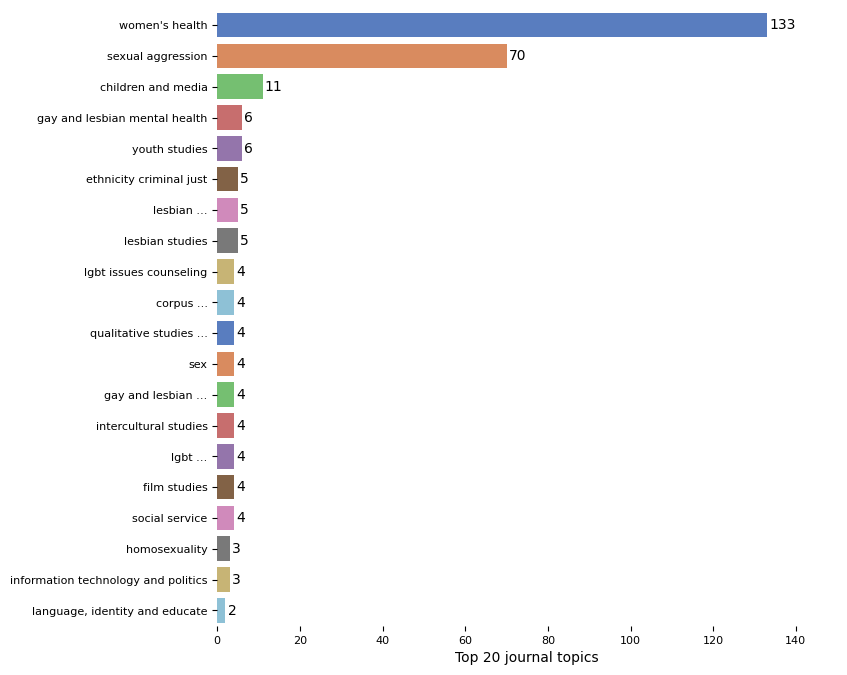

In [195]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_20_journals = df_journal[:20]
p = sns.barplot(x="journal_counts", y="names", data=top_20_journals,
            label="journal_counts", palette=palette)
ax.set(xlim=(0, 150))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=10, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 journal topics", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

In [199]:
# Top 10 conferences
fig = px.bar(df_conference[:10], x="conferences_counts", y="names", color="names",
            hover_data=['names'], barmode = 'stack',
            text ='conferences_counts')
fig.update_layout(title_text='', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

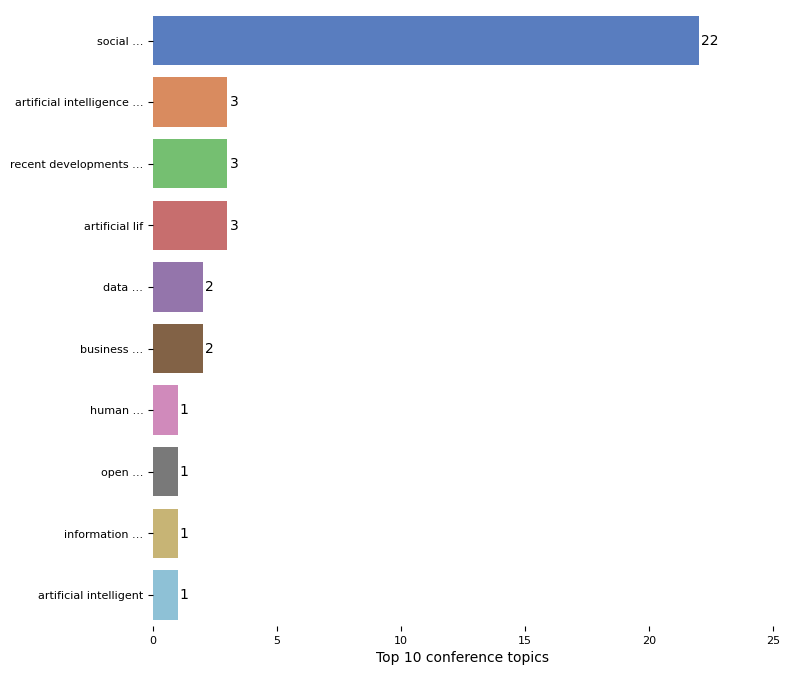

In [198]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_10_conferences = df_conference[:10]
p = sns.barplot(x="conferences_counts", y="names", data=top_10_conferences,
            label="conferences_counts", palette=palette)
ax.set(xlim=(0, 25))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=10, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 10 conference topics", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

In [200]:
# Books do not have that many topics, hence taking only top 5
fig = px.bar(df_book[:5], x="books_counts", y="names", color="names",
            hover_data=['names'], barmode = 'stack',
            text ='books_counts')
fig.update_layout(title_text='', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

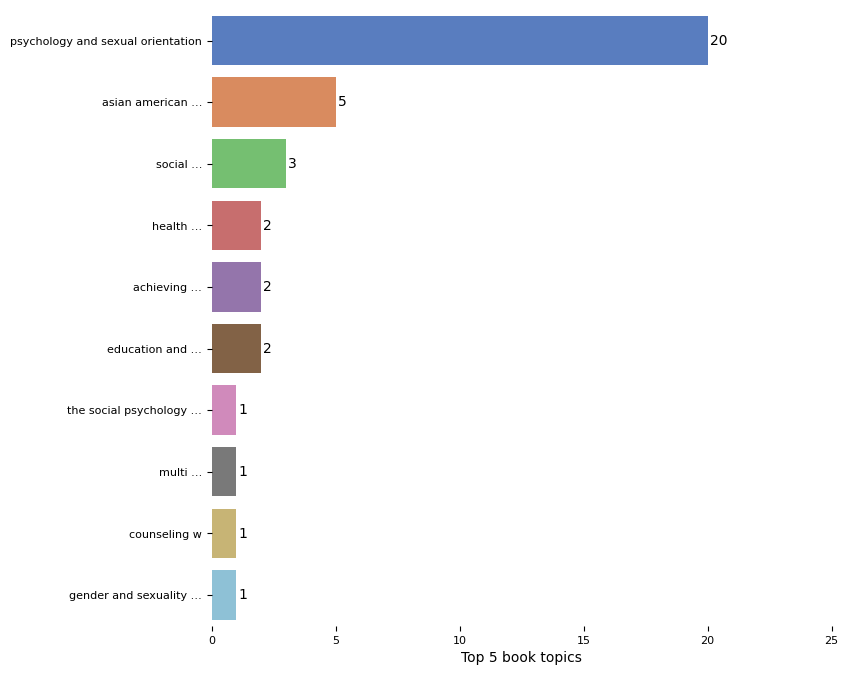

In [201]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_5_books = df_book[:10]
p = sns.barplot(x="books_counts", y="names", data=top_5_books,
            label="books_counts", palette=palette)
ax.set(xlim=(0, 25))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=10, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 5 book topics", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

### Subjects and their count

In [202]:
# This dataframe consists of all the categories of subjects, irrespective of the source type

df_sub = pd.DataFrame({
    'subjects': df_sou_sub['subjects'].unique().tolist(),
    'counts': df_sou_sub['subjects'].value_counts(),
}).reset_index(drop=True)

df_sub[:50]

,subjects,counts
0,women's health,94
1,sexual aggression,20
2,psychology and sexual orientation,15
3,children and media,11
4,gay and lesbian mental health,9
5,youth studies,8
6,social …,6
7,ethnicity criminal just,5
8,lesbian …,5
9,lesbian studies,5


In [203]:
fig = px.bar(df_sub[:20], x="counts", y="subjects", color="subjects",
            hover_data=['subjects'], barmode = 'stack',
            text ='counts')
fig.update_layout(title_text='', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

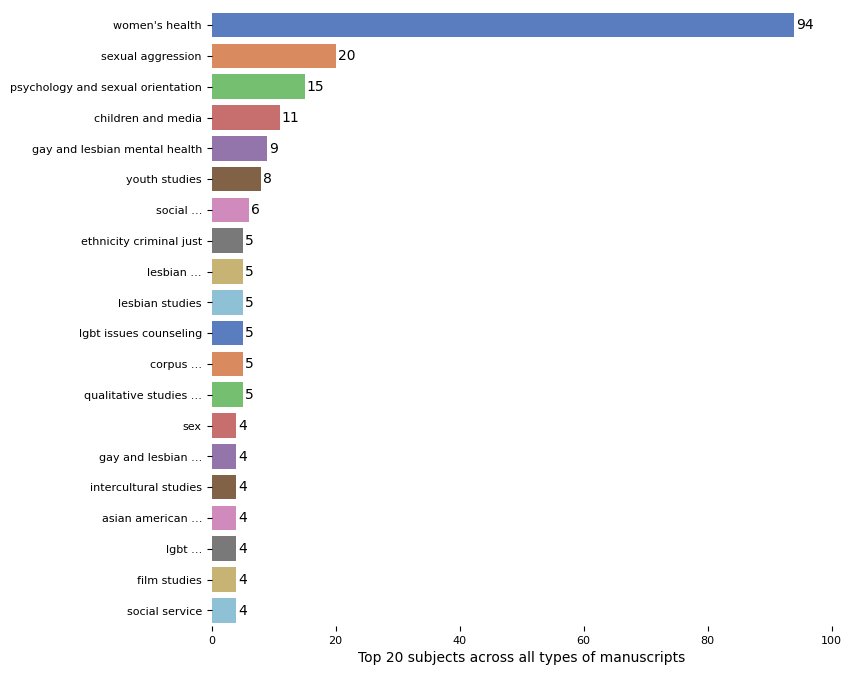

In [206]:
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
top_20_subjects = df_sub[:20]
p = sns.barplot(x="counts", y="subjects", data=top_20_subjects,
            label="counts", palette=palette)
ax.set(xlim=(0, 100))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=10, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 subjects across all types of manuscripts", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)

Mostly shows journal topics, as it is in bulk.

##### Packing the values together

In [45]:
# https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

data = [{'id': 'Publication', 'datum': 271, 'children' : [
              {'id' : "Journals", 'datum': 206,
                   'children' : [
                     {'id' : "women's health", 'datum' : 113},
                     {'id' : "sexual aggression", 'datum' : 70},
                     {'id' : "children and media", 'datum' : 11},
                     {'id' : "LGBTQ+ mental health", 'datum' : 6},
                     {'id' : "youth studies", 'datum' : 6}  
                   ]},
              {'id' : "Conferences", 'datum' : 33, 
                   'children' : [
                     {'id' : "social", 'datum' : 22},
                     {'id' : "artificial intelligence", 'datum' : 3},
                     {'id' : "recent developments", 'datum' : 3},
                     {'id' : "artificial life", 'datum' : 3},
                     {'id' : "data", 'datum' : 2}
                   ]},
              {'id' : "Books", 'datum' : 32,  
                   'children' : [
                     {'id' : "psychology and sexual orientation", 'datum' : 20},
                     {'id' : "asian american", 'datum' : 5},
                     {'id' : "social", 'datum' : 3},
                     {'id' : "health", 'datum' : 2},
                     {'id' : "achieving", 'datum' : 2}
                   ]}
    ]}]

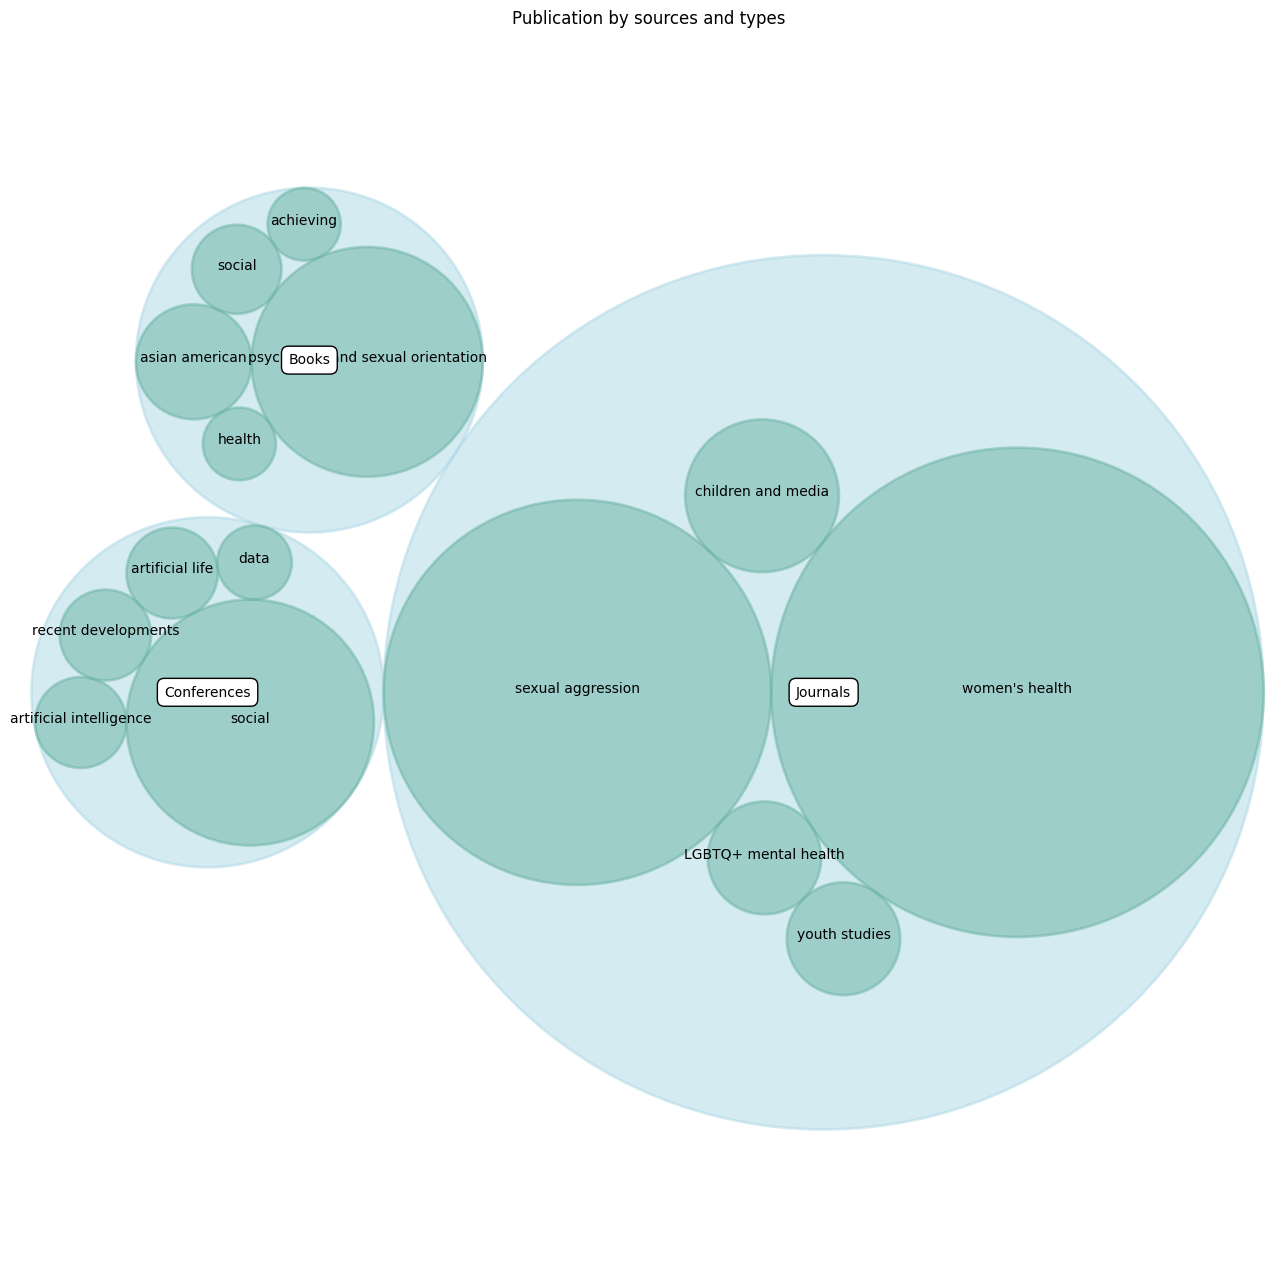

In [46]:
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(16,16))

# Title
ax.set_title('Publication by sources and types')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="black")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))



#### Subjects with their respective disciplines

In [47]:
# Needs hard-coding the subjects to their respective disciplines

df_sou_sub['Source'].value_counts()[:50].keys().to_list() #most of them are missing information
# this limits further analysis in this one


['journal of …',
 'encyclopedia of couple and family therapy',
 'international journal of …',
 'journal of homosexuality',
 'journal of gender studies',
 'journal of aggression …',
 'journal of lgbt youth',
 'journal of gay & …',
 'american journal of …',
 'encyclopedia of gerontology and population aging',
 'journal of lesbian studies',
 'international journal of social robotics',
 'international journal of qualitative studies in …',
 'the journal of sex …',
 'journal of sexual aggressi',
 'journal of lgbt …',
 'the journal of sex research',
 'journal of aggression, maltreatment & …',
 'journal of marketing manage',
 '… . italian journal of …',
 'handbook of gender and sexuality in …',
 'journal of social service …',
 'european journal of engineering educati',
 'chi conference on human …',
 'isys brazilian journal of …',
 'journal of family …',
 '… conference on social …',
 'journal of trauma & …',
 'international journal of advertising',
 'international journal of environmental resea

### Social Media

In [48]:
social_media_lst = ["twitter", "facebook", "reddit", "instagram", "whatsapp",
                    "gab", "2chan", "4chan", "8chan", "youtube", "linkedin", "tumblr"]

pattern = '|'.join(r"\b{}\b".format(x) for x in social_media_lst)
df["Platform of interest"] = df['Abstract'].str.findall(pattern, flags=re.I).str.join(' ')
df["Platform of interest"].unique()

array(['', nan, 'Facebook', 'Twitter', 'YouTube', 'Facebook Twitter',
       '4Chan', 'twitter', '4chan', '4chan 8chan', 'Twitter Gab',
       'Facebook Instagram', 'Gab', 'Instagram', 'Reddit', 'gab',
       'YouTube Twitter twitter', 'LinkedIn Twitter Facebook Instagram',
       'Twitter Twitter'], dtype=object)

In [49]:
# taking in only the platforms which showed in the string extraction
twitter_count = df["Platform of interest"].str.lower().str.contains('twitter').sum()
fb_count = df["Platform of interest"].str.lower().str.contains('facebook').sum()
fourchan_count = df["Platform of interest"].str.lower().str.contains('4chan').sum()
eightchan_count = df["Platform of interest"].str.lower().str.contains('8chan').sum()
youtube_count = df["Platform of interest"].str.lower().str.contains('youtube').sum()
gab_count = df["Platform of interest"].str.lower().str.contains('gab').sum()
instagram_count = df["Platform of interest"].str.lower().str.contains('instagram').sum()
reddit_count = df["Platform of interest"].str.lower().str.contains('reddit').sum()
linkedin_count = df["Platform of interest"].str.lower().str.contains('linkedin').sum()


df_social_media_counts = pd.DataFrame({'Social Media Platforms': ['Twitter', 'Facebook', '4chan', '8chan',
                                                                 'YouTube', 'Gab', 'Instagram', 'Reddit', 'LinkedIn'], 
                                       'Counts': [twitter_count, fb_count, fourchan_count, eightchan_count,
                                                 youtube_count, gab_count, instagram_count, reddit_count, linkedin_count]})

fig = px.bar(df_social_media_counts, x='Counts', y='Social Media Platforms', text='Counts', color='Social Media Platforms')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)

'''
fig.add_annotation(
        x=30,
        y=3,
        xref="x",
        yref="y",
        text="Twitter seems to be the most sought after social media platform, <br> exceeding much ahead of the other platforms in the list. <br> Overall the top 2 platforms- Twitter and Facebook <br> outnumber the other platforms, even though some of them,<br> e.g., Reddit, Gab and 4chan have been known for their misogynistic contents.",
        showarrow=False,
        font=dict(
            family="Muli, sans-serif",
            size=14,
            color="#222A2A"
            ),
        align="center",
        arrowcolor="#636363",
        ax=120,
        ay=-20,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )
'''

fig.show()


#### Joining the title and abstract for further analysis

In [50]:
df_conf_jour['Title & Abstract'] = df_conf_jour['Title'] + ' ' + df_conf_jour['Abstract']

#nltk.download('punkt');
#nltk.download('stopwords');

def preprocess_text(text):
    spell = Speller(lang='en') #check spellings 
    text = spell(text) # does not seem to work well on this. Works better on individual sentences
    tokens = nltk.word_tokenize(text) #tokenize
    text = [w for w in tokens if w.isalpha()]  
    stops = set(stopwords.words("english")) #eliminate stopwords
    text = [word for word in text if not word in stops]
    stemmer = PorterStemmer() #stemming
    text = [stemmer.stem(word) for word in text]
    return ( " ".join(text)) #rejoin the words


df_conf_jour['Title & Abstract'] = df_conf_jour.apply(lambda x: preprocess_text(x['Title & Abstract']), axis=1)
df_conf_jour['Title & Abstract']

5       abstract nih offic research women health ninth...
9       an overview literatur anteced percept behaviou...
12      blood lust love interrog gender violenc twilig...
25      do act tell discrimin base gender nonconform e...
27      examin launch cultur thesi young australian wo...
                              ...                        
3875    zero toler sexual harm broken rule broken syst...
3880    how everi black man histor narr construct iden...
3881    i wa lose that sens her be happi children dela...
3887    view equal the impact librari organiz cultur m...
3890    you prove threat real understand need femal jo...
Name: Title & Abstract, Length: 610, dtype: object

In [51]:
spell = Speller(lang='en') #check spellings 
text = spell('how everi black man histor narr construct')
text #works fine in here

'how every black man history rarr construct'

In [52]:
df_conf_jour['ArticleURL'].iloc[10]

'https://www.tandfonline.com/doi/abs/10.1080/15538605.2012.726150'

In [53]:
len(df_conf_jour), len(df_conf_jour['ArticleURL'].unique()) #So all the studies here come with their url link

(610, 610)

In [54]:
# first converting all the links into a list 
list_urls = list(df_conf_jour['ArticleURL'].unique())
list_urls

['https://www.liebertpub.com/doi/full/10.1089/jwh.2012.ab02',
 'https://www.tandfonline.com/doi/abs/10.1080/13552600.2010.501909',
 'https://www.tandfonline.com/doi/abs/10.1080/17482798.2011.619549',
 'https://www.tandfonline.com/doi/abs/10.1080/19359705.2012.658013',
 'https://www.tandfonline.com/doi/abs/10.1080/13676261.2012.693597',
 'https://link.springer.com/chapter/10.1007/978-3-642-34103-8_17',
 'https://www.tandfonline.com/doi/abs/10.1080/15377938.2012.722883',
 'https://www.tandfonline.com/doi/abs/10.1080/10894160.2011.605009',
 'https://www.tandfonline.com/doi/abs/10.1080/19359705.2012.671126',
 'https://www.tandfonline.com/doi/abs/10.1080/10894160.2011.557641',
 'https://www.tandfonline.com/doi/abs/10.1080/15538605.2012.726150',
 'https://www.jbe-platform.com/content/journals/10.1075/ijcl.17.2.05pre',
 'https://www.tandfonline.com/doi/abs/10.1080/09518398.2012.720729',
 'https://www.tandfonline.com/doi/abs/10.1080/00224499.2011.637247',
 'https://www.tandfonline.com/doi/abs/

In [55]:
# Only the arXiv manuscripts
df_archive = df[(df["Publisher"] == 'arXiv')]
urls_only = list(df_archive['ArticleURL'].unique())
urls_only

['https://arxiv.org/abs/1812.02712',
 'https://arxiv.org/abs/1809.08726',
 'https://arxiv.org/abs/1805.05345',
 'https://arxiv.org/abs/1801.04433',
 'https://arxiv.org/abs/1808.07235',
 'https://arxiv.org/abs/1812.06700',
 'https://arxiv.org/abs/1809.03944',
 'https://arxiv.org/abs/1808.07231',
 'https://arxiv.org/abs/1808.01076',
 'https://arxiv.org/abs/1904.04073',
 'https://arxiv.org/abs/1910.03270',
 'https://arxiv.org/abs/1904.05152',
 'https://arxiv.org/abs/1910.01043',
 'https://arxiv.org/abs/1908.06165',
 'https://arxiv.org/abs/1911.03842',
 'https://arxiv.org/abs/1910.00920',
 'https://arxiv.org/abs/1905.12516',
 'https://arxiv.org/abs/1911.03891',
 'https://arxiv.org/abs/1908.06024',
 'https://arxiv.org/abs/1911.11025',
 'https://arxiv.org/abs/2005.06946',
 'https://arxiv.org/abs/2008.07371',
 'https://arxiv.org/abs/2008.09656',
 'https://arxiv.org/abs/2010.03776',
 'https://arxiv.org/abs/2005.03909',
 'https://arxiv.org/abs/2012.09110',
 'https://arxiv.org/abs/2006.08328',
 

### Topic modelling with sentence embedding

In [56]:
#https://www.kdnuggets.com/2020/11/topic-modeling-bert.html
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = df_conf_jour['Title & Abstract'].tolist()

sentence_embeddings = model.encode(sentences, show_progress_bar=True)


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

In [57]:
'''
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
'''

'\nfor sentence, embedding in zip(sentences, sentence_embeddings):\n    print("Sentence:", sentence)\n    print("Embedding:", embedding)\n    print("")\n'

In [73]:
sentence_embeddings.shape

(610, 384)

In [143]:
umap_data_1 = umap.UMAP(n_neighbors=100, n_components=50, min_dist=0.2, metric='cosine').fit_transform(sentence_embeddings)
umap_data_1.shape

(610, 50)

In [144]:
umap_data_plot = umap.UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine').fit_transform(umap_data_1)
umap_data_plot.shape

(610, 2)

In [145]:
# Prepare data

cluster = hdbscan.HDBSCAN(min_cluster_size=20,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_data_plot)

result = pd.DataFrame(umap_data_plot, columns=['x', 'y'])
result['labels'] = cluster.labels_

len(result.labels.unique())

7

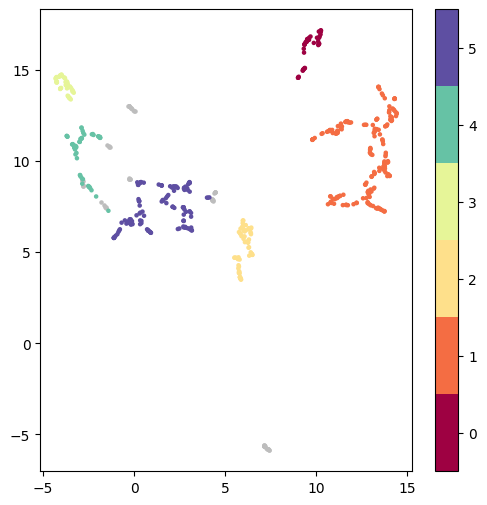

In [146]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(6, 6))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6)) 

The results are pretty good. The UMAP was able to distinctly capture all the digit classes, with none of them blending into each other. Also, there are only a few outliers (58).

In [147]:
len(result.labels.unique()), result.labels.unique()

(7, array([ 1, -1,  5,  2,  0,  4,  3]))

In [159]:
# See the outliers
len(result[result.labels==-1])

58

In [148]:
result[result.labels==2] # check with another label

,x,y,labels
12,5.866344,3.498976,2
21,5.859922,3.511131,2
23,6.396910,4.995491,2
29,5.808523,3.628515,2
36,6.493611,4.855068,2
...,...,...,...
586,5.751433,6.106753,2
587,5.752734,3.876858,2
592,5.682784,4.668073,2
600,5.521575,4.707108,2


### Applying class-based TF-IDF

In [160]:
docs_df = pd.DataFrame(df_conf_jour)
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
#docs_per_topic = docs_df.groupby(['Topic'], as_index = False)
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Title & Abstract': ' '.join})

In [161]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic['Title & Abstract'].values, m=len(data))

#### Topic representation

In [162]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     ['Title & Abstract']
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Title & Abstract": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
2,1,208
6,5,128
3,2,67
0,-1,58
5,4,57
1,0,48
4,3,44


In [163]:
top_n_words[1][:30]
## Shows a lot of mis-spellings

[('ıreal', -0.0),
 ('grown', 0.0),
 ('golf', 0.0),
 ('gone', 0.0),
 ('good', -0.0),
 ('graduat', 0.0),
 ('grampian', 0.0),
 ('grandmast', 0.0),
 ('graph', -0.0),
 ('gravit', 0.0),
 ('graviti', 0.0),
 ('gray', 0.0),
 ('great', 0.0),
 ('greek', 0.0),
 ('grievanc', 0.0),
 ('grow', -0.0),
 ('gsm', 0.0),
 ('handwrit', 0.0),
 ('gt', -0.0),
 ('guid', -0.0)]

### Word + Doc Embedding

In [169]:
# Word embedding model
ft = api.load('fasttext-wiki-news-subwords-300')

In [170]:
# Document embedding model
embedding_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Create a model that uses both language models and pass it through BERTopic
word_doc_embedder = WordDocEmbedder(embedding_model=embedding_model, word_embedding_model=ft)

topic_model = BERTopic(embedding_model=word_doc_embedder)
#embeddings_worddoc = topic_model.encode(data, show_progress_bar=True)

In [171]:
topics, probs = topic_model.fit_transform(df_conf_jour['Title & Abstract'].to_list())

freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,4,-1_health_discrimin_injuri_spinal
1,0,591,0_recommend_hate_sexism_power
2,1,15,1_robot_human_artifici_intellig


In [172]:
topic_model.get_topic(0)

[('recommend', 0.05778671626135139),
 ('hate', 0.05724410592879134),
 ('sexism', 0.05327957100857916),
 ('power', 0.04755704930157202),
 ('detect', 0.04688480649318544),
 ('driven', 0.04602957204341308),
 ('articl', 0.03865547040988477),
 ('speech', 0.03769484004367901),
 ('learn', 0.03643800223809499),
 ('abus', 0.036281507535377705)]

It just shows that the data in abstract and title is simply not enough for the model to cluster topics. The embeddings are hence not so useful when the data gives little information on the text, that too with fewer instances, providing with a much lesser example for the model to learn from.